In [1]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Carico il file e stampo a schermo per fare una prova

In [60]:
train = pd.read_csv('train.csv')
train.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,F,73.96,Others,79.0,Others,Commerce,67.0,Comm&Mgmt,No,72.15,Mkt&Fin,63.08,280000.0
1,Placed,M,73.00,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,420000.0
2,Placed,M,81.00,Others,68.0,Others,Science,64.0,Sci&Tech,No,93.00,Mkt&Fin,62.56,411000.0
3,Not Placed,M,44.00,Central,58.0,Central,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,NaN
4,Placed,M,66.00,Central,76.0,Central,Commerce,72.0,Comm&Mgmt,Yes,84.00,Mkt&HR,58.95,275000.0


#### Per effettuare l'analisi mi metto a lavorare su un file di copia, per sicurezza

In [61]:
tset = train.copy()
tset.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,F,73.96,Others,79.0,Others,Commerce,67.0,Comm&Mgmt,No,72.15,Mkt&Fin,63.08,280000.0
1,Placed,M,73.00,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,420000.0
2,Placed,M,81.00,Others,68.0,Others,Science,64.0,Sci&Tech,No,93.00,Mkt&Fin,62.56,411000.0
3,Not Placed,M,44.00,Central,58.0,Central,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,NaN
4,Placed,M,66.00,Central,76.0,Central,Commerce,72.0,Comm&Mgmt,Yes,84.00,Mkt&HR,58.95,275000.0


### Esaminiamo il dataset controlando i tipi e la presenza di eventuali valori nulli

In [62]:
print (tset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          132 non-null    object 
 1   gender          132 non-null    object 
 2   ssc_p           132 non-null    float64
 3   ssc_b           132 non-null    object 
 4   hsc_p           132 non-null    float64
 5   hsc_b           132 non-null    object 
 6   hsc_s           132 non-null    object 
 7   degree_p        132 non-null    float64
 8   degree_t        132 non-null    object 
 9   workex          132 non-null    object 
 10  etest_p         132 non-null    float64
 11  specialisation  132 non-null    object 
 12  mba_p           132 non-null    float64
 13  salary          91 non-null     float64
dtypes: float64(6), object(8)
memory usage: 14.6+ KB
None


In [63]:
tset.isnull().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            41
dtype: int64

#### Abbiamo dei valori nulli in corrispondenza del valore "salary". Logicamente c'era da aspettarselo in quanto una persona non assunta non può percepire un salario.
### Bisogna gestire questi valori Nan:
#### Non si possono cancellare i dati corrispondenti o si perderebbero le informazioni sul perché i candidati non siano stati assunti. Un'idea potrebbe essere quella di assegnare il valore della media dei valori di "salary" ma così si avrebbero dei dati lolgicamente sbagliati(salari su candidati non assunti). Si opta dunque per impostare a 0 il valore "salary", che mostra che persone respinte non percepiscono alcun salario.

In [64]:
tset['salary'].fillna(value=0, inplace=True)
tset.isnull().sum()

status            0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

### Ad un primo sguardo, sono in dubbio che la feature "scc-b" relativa alla board of education della middle school, e la feature "hsc_b" relativa alla board of education della high school non siano poi così influenti per quel che riguarda l'analisi. Eseguo uno studio per assicurarmi che un eventuale drop sia sensato o sia una perdita di informazioni utili.
#### Vado a graficare queste feature per vedere se ci sono effettivamente differenze utili...

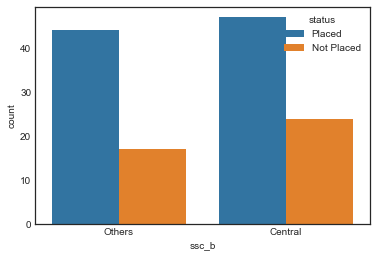

In [65]:
sns.countplot(x="ssc_b", hue="status", data=tset)
plt.show()

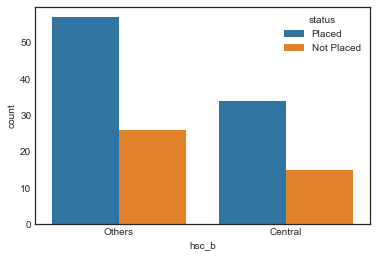

In [66]:
sns.countplot(x="hsc_b", hue="status", data=tset)
plt.show()

#### Come si può vedere dai grafici, le feature considerate non influiscono particolarmente sullo stato di collocamento, possiamo pensare di effettuare un drop per snellire l'analisi senza perdere di informazione
### Dopo aver confrontato la Board of Education, confrontiamo i punteggi.

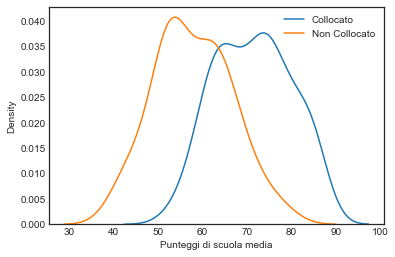

In [67]:
sns.kdeplot(tset.ssc_p[ tset.status=="Placed"])
sns.kdeplot(tset.ssc_p[ tset.status=="Not Placed"])
plt.legend(["Collocato", "Non Collocato"])
plt.xlabel("Punteggi di scuola media")
plt.show()

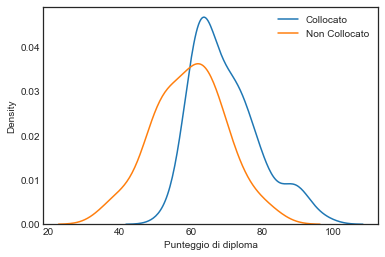

In [68]:
sns.kdeplot(tset.hsc_p[ tset.status=="Placed"])
sns.kdeplot(tset.hsc_p[ tset.status=="Not Placed"])
plt.legend(["Collocato", "Non Collocato"])
plt.xlabel("Punteggio di diploma")
plt.show()

#### Vediamo che studenti con una buon punteggio di uscita dalle media sia generalmente collocato. In particolare studenti che escono con un punteggio superiore a 90 sono sempre assunti. Per quanto riguarda i voti dei diplomi invece, è più probabile essere assunti se si ha un punteggio superiore a circa 65, ma al contrario del grafico precedente, si ha un significativo crollo nei collocamenti di candidati i quali hanno un punteggio inferiore a 60.
### Si può dunque affermare che, per quanto la Board of Education non sia una feature significativa, il punteggio che i candidati hanno avuto durante la scuola può influire sullo stato di collocamento.
### In generale si può dire che i candidati che hanno ricevuto voti inferiori a 60 sono tendenzialmente svantaggiati, in quanto potrebbero non aver colmato le lacune nelle basi e dunque potrebbero non essere egualemte qualificati, nonstante il punteggio ricevuto nelle prove successive
#### Questo discorso può essere ulterirmente riscontrato nei seguenti grafici:

<AxesSubplot:xlabel='status', ylabel='degree_p'>

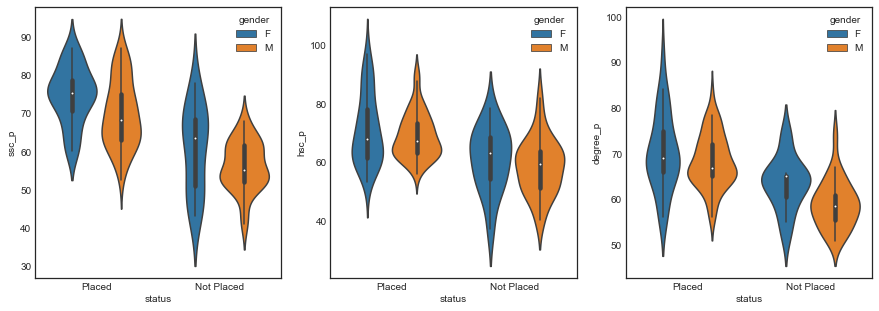

In [129]:
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(x="status", y="ssc_p", data=tset,kind="swarm",hue='gender', ax=axarr[0])
sns.violinplot(x="status", y="hsc_p", data=tset,kind="swarm",hue='gender', ax=axarr[1])
sns.violinplot(x="status", y="degree_p", data=tset,kind="swarm",hue='gender', ax=axarr[2])


### Effettuiamo ora un conteggio delle altre caratteristiche categoriche per farci un'idea ulteriormente più chiara sui dati che stiamo maneggiando

<AxesSubplot:xlabel='status', ylabel='count'>

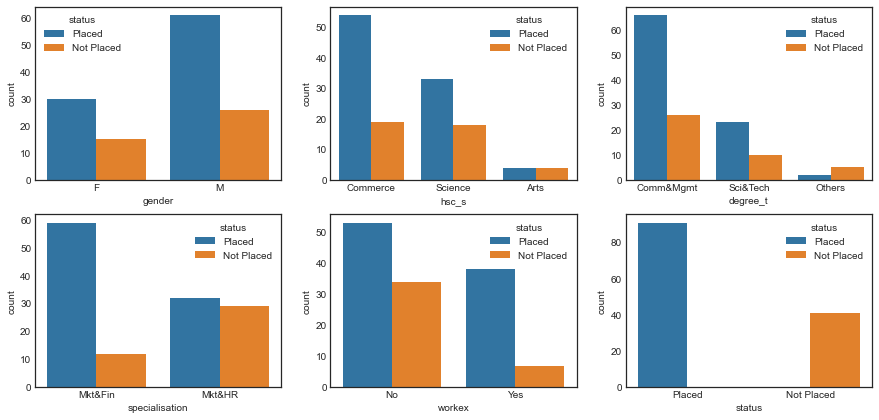

In [69]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 7))

sns.countplot(x='gender',hue = 'status',data = tset, ax=axarr[0][0])
sns.countplot(x='hsc_s', hue = 'status',data = tset, ax=axarr[0][1])
sns.countplot(x='degree_t', hue = 'status',data = tset, ax=axarr[0][2])
sns.countplot(x='specialisation', hue = 'status',data = tset, ax=axarr[1][0])
sns.countplot(x='workex', hue = 'status', data = tset, ax=axarr[1][1])
sns.countplot(x='status', hue = 'status', data = tset, ax=axarr[1][2])

Considerazoni in breve:
- Nonostante i candidati maschi siano maggiori in numero delle femmine, si ha comunque una tendenza a collocare candidati maschi piuttosto che femmine.
- La maggior parte dei candidati collocati vengono da studi superiori di commercio e management, discorso analogo per i laureati.
- la richiesta di specializzati in marketing è generalmente alta, con priorità a chi sceglie un percorso incentrato sulla finanza.
- La maggior parte dei candidati non ha esperienze lavorative pregresse ma questo non sembra essere uno svantaggio.
- Fra tutte le persone prese in analisi, la maggio parte di esse è stata assunta da qualche compagnìa.

### Andiamo a vedere, in modod analogo a quanto fatto prima, quanto il punteggio di laurea infuisca con lo stato di collocamento

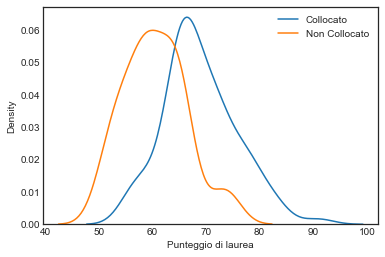

In [108]:
sns.kdeplot(tset.degree_p[ tset.status=="Placed"])
sns.kdeplot(tset.degree_p[ tset.status=="Not Placed"])
plt.legend(["Collocato", "Non Collocato"])
plt.xlabel("Punteggio di laurea")
plt.show()

#### Come ci si aspettava, maggiore è il punteggio con cui si ottiene la laurea e più facile sarà essere addunti da qualche compagnia. In modo particolare, chi ha ricevuto un punteggio superiore ad 85 è molto più avvantaggiato.
#### E invece vi è una correlazione con il punteggio del conseguimetno della specialistica?

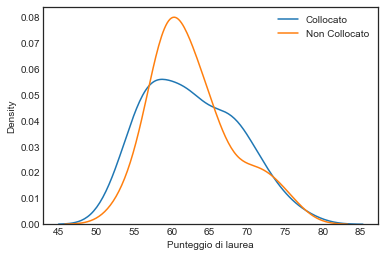

In [109]:
sns.kdeplot(tset.mba_p[ tset.status=="Placed"])
sns.kdeplot(tset.mba_p[ tset.status=="Not Placed"])
plt.legend(["Collocato", "Non Collocato"])
plt.xlabel("Punteggio di laurea")
plt.show()

#### Sono sorpreso di notare che no, non vi è correlazione, o almeno non vi è in modo così forte e scandito come pensavo
#### Ora vediamo l'ultimo dei punteggi assegnati ad ogni candidato, quello relativo al test di collocabilità condotto dal college.

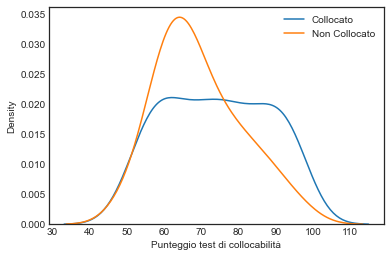

In [136]:
sns.kdeplot(tset.etest_p[ tset.status=="Placed"])
sns.kdeplot(tset.etest_p[ tset.status=="Not Placed"])
plt.legend(["Collocato", "Non Collocato"])
plt.xlabel("Punteggio test di collocabilità")
plt.show()

#### Il discorso è sempre lo stesso, candidati che hanno avuto punteggi altri sono più soliti ad essere assunti in futuro. Candidati con un punteggio superiore a 85 hanno una probalità maggiore di essere assunti in futuro, e in modo analogo a quanto riscontrato in precedenza, quando il punteggio scende sotto il 65-70% si ha una probabilità maggiore di non essere collocati.

### Discutiamo più nel dettaglio alcuni degli aspetti appena visti

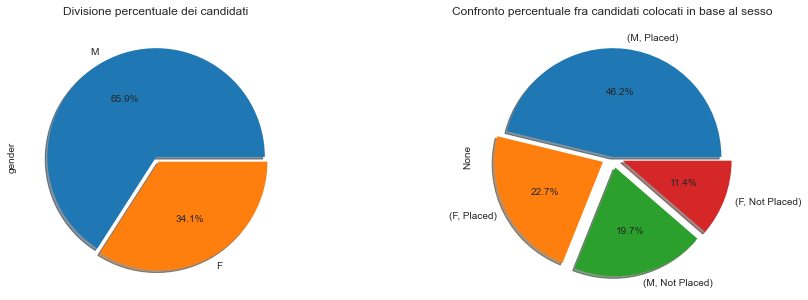

In [106]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(15, 5))
tset['gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Divisione percentuale dei candidati')

l = tset[['gender','status']]
l.value_counts().plot.pie(explode = (0, 0.1, 0.1, 0.1),autopct='%1.1f%%', ax=ax[1],shadow=True)
ax[1].set_title('Confronto percentuale fra candidati colocati in base al sesso')

plt.show()

### Ci siamo accertati dell'affermazione sopra citata, nonostante i candidati maschi siano maggiori in numero delle femmine, si ha comunque una tendenza a collocare candidati maschi piuttosto che femmine.
### Approfondiamo ora uno degli aspetti probabilmente più interessante per i candidati: Quanto è importante avere un'esperienza lavorativa per fare esperienza lavorativa?

Text(0.5, 1.0, 'Confronto percentuale fra candidati colocati in base al sesso')

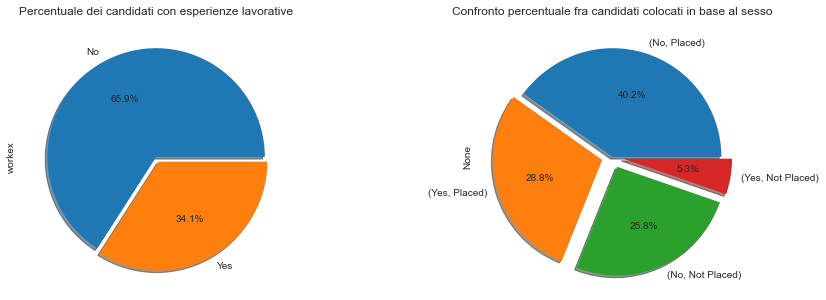

In [105]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(15,5))
tset['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentuale dei candidati con esperienze lavorative')

l = tset[['workex','status']]
l.value_counts().plot.pie(explode = (0, 0.1, 0.1, 0.1),autopct='%1.1f%%', ax=ax[1],shadow=True)
ax[1].set_title('Confronto percentuale fra candidati colocati in base al sesso')

### In modo analogo, confermiamo che l'esperienza lavorativa non è prerogativa per essere assunti. Nonostante ciò, si noti che non è inutile, infatti è comunque raro che chi ha già esperienza non sia in grado di essere collocato
### Vediamo infine quanto il settore disciplinare scelto sia indicativo dello stato di collocamento.

<AxesSubplot:xlabel='degree_t', ylabel='salary'>

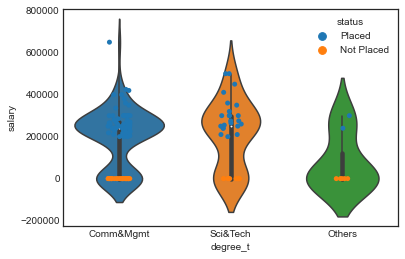

In [131]:
sns.violinplot(x="degree_t", y="salary", data=tset)
sns.stripplot(x="degree_t", y="salary", data=tset,hue='status')


#### Il settore disciplinare più rischiesto per le assunzioni è  quello di comunicazione e managment, al secondo posto quello scientifico e tecnologico, dovuto anche al fatto che il numero di studento in questo campo sia notoriamente minore

### E' stata tralasciata l'analisi relativa alla feature "salary" poichè, come scritto anche sopra, il salario percepito è una buona fonte di informazioni relativa unicamente alle persone che sono già state assunte e non può aiutare a capire quanto un candidato sia qualificato o meno per essere collocato. E' stato dunque tralasciata per non spostare l'attenzione dell'analisi e per lo stesso motivo non verrà considerata nel training( altrimenti si avrebbe come unico metro di paragone, ovvero un candiddato che non percepisce alcun salario ha ovviamente il 100% di probabilità di non essere collocato).

## A questo punto possiamo pensare di iniziare a costruire un modello per il trainig
##### Vista la differenza di quantità di informazione che c'è tra le varie features, opto per un modello di decision tree per eseguire l'addestramento, ed in seguito ad esso, dopo aver valutato il risultato, eseguo un check rapido sull'importanza delle varie features. 

### E' il momento di convertire i valori non muerici in numeri, ma prima ricordiamoci di eseguire un drop delle features che abbiamo scoperto non contenere informazione utile

In [135]:
tset.drop(['ssc_b','hsc_b','salary'], axis = 1,inplace=True) 
tset.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,Placed,F,73.96,79.0,Commerce,67.0,Comm&Mgmt,No,72.15,Mkt&Fin,63.08
1,Placed,M,73.00,78.0,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16
2,Placed,M,81.00,68.0,Science,64.0,Sci&Tech,No,93.00,Mkt&Fin,62.56
3,Not Placed,M,44.00,58.0,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54
4,Placed,M,66.00,76.0,Commerce,72.0,Comm&Mgmt,Yes,84.00,Mkt&HR,58.95


In [138]:
from sklearn.preprocessing import LabelEncoder

for label in tset.columns:
    if(label in ['status','gender','hsc_s','degree_t','workex', 'specialisation']):
        tset[label] = LabelEncoder().fit_transform(tset[label])
tset.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,0,73.96,79.0,1,67.0,0,0,72.15,0,63.08
1,1,1,73.00,78.0,1,65.0,0,1,95.46,0,62.16
2,1,1,81.00,68.0,2,64.0,2,0,93.00,0,62.56
3,0,1,44.00,58.0,0,55.0,0,1,64.25,1,58.54
4,1,1,66.00,76.0,1,72.0,0,1,84.00,1,58.95


#### effettuo le stesse trasformazioni sul file di test

In [139]:
testset = pd.read_csv('test.csv')
testset.drop(['ssc_b','hsc_b','salary'], axis = 1,inplace=True) 

testset.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,65.00,Central,68.00,Others,Science,69.00,Comm&Mgmt,No,53.70,Mkt&HR,55.01,250000.0
1,Not Placed,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,NaN
2,Not Placed,F,40.89,Others,45.83,Others,Commerce,53.00,Comm&Mgmt,No,71.20,Mkt&HR,65.49,NaN
3,Placed,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,940000.0
4,Placed,M,73.00,Central,78.00,Central,Science,73.00,Sci&Tech,Yes,85.00,Mkt&HR,65.83,240000.0


In [141]:
from sklearn.preprocessing import LabelEncoder

for label in testset.columns:
    if(label in ['status','gender','hsc_s','degree_t','workex', 'specialisation']):
        testset[label] = LabelEncoder().fit_transform(testset[label])
tset.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,0,73.96,79.0,1,67.0,0,0,72.15,0,63.08
1,1,1,73.00,78.0,1,65.0,0,1,95.46,0,62.16
2,1,1,81.00,68.0,2,64.0,2,0,93.00,0,62.56
3,0,1,44.00,58.0,0,55.0,0,1,64.25,1,58.54
4,1,1,66.00,76.0,1,72.0,0,1,84.00,1,58.95


In [142]:
y_train = tset["status"].values
x_train = tset.drop(["status"], axis=1).values

y_test = testset["status"].values
x_test = testset.drop(["status"], axis=1).values

In [143]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.85000


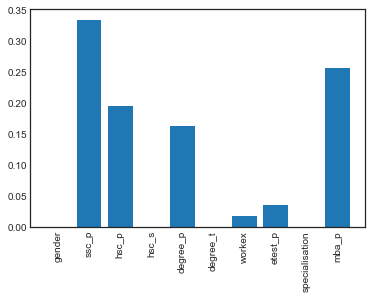

In [146]:
plt.bar(testset.columns.drop(["status"]), dt.feature_importances_)
plt.xticks(testset.columns.drop(["status"]), testset.columns.drop(["status"]), rotation='vertical')
plt.show()

##### Per quel che riguarda gender e degree_t c'era da aspettarselo. Il basso contenuto informativo si specialisation era in qualche modo anticipato nell'analisi. Sono invece piuttosto sorpreso di hsc_s, etest_p dalle quali mi aspettavo un contributo molto più rilveante. C'è da ammettere però che la qualità e lo sforzo di un candidato non può essere garantita da un unico voto, nel lasso di tempo tra la prova in questione e il colloqui di lavoro potrebbe esserci stata una preparazione extra che di cui i voti passati non possono tener conto.
### Nonostante il risultato ottenuto sia soddisfacente, procedo ad eseguire un drop di tutte le feature che risultano avere poco o nullo contributo per uno studio leggermente più approfondito

In [148]:
tset = tset.drop(columns=['gender','hsc_s','degree_t','workex','etest_p','specialisation'])
testset = testset.drop(columns=['gender','hsc_s','degree_t','workex','etest_p','specialisation'])

,status,ssc_p,hsc_p,degree_p,mba_p
0,1,73.96,79.0,67.0,63.08
1,1,73.00,78.0,65.0,62.16
2,1,81.00,68.0,64.0,62.56
3,0,44.00,58.0,55.0,58.54
4,1,66.00,76.0,72.0,58.95


In [150]:
y_train = tset["status"].values
x_train = tset.drop(["status"], axis=1).values

y_test = testset["status"].values
x_test = testset.drop(["status"], axis=1).values

In [151]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.85000


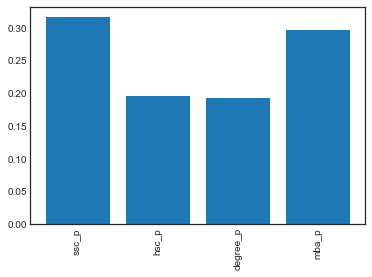

In [152]:
plt.bar(testset.columns.drop(["status"]), dt.feature_importances_)
plt.xticks(testset.columns.drop(["status"]), testset.columns.drop(["status"]), rotation='vertical')
plt.show()

## Conclusioni
##### Come ci si poteva aspettare, le feature escluse dal training hanno poco contributo informativo, sia nel bene che nel male, dunque rimuovendole o conservandole si avrà lo stesso risultato di accuratezza. Le caratteristiche che statisticamente contraddistinguono un candidato collocato sono i voti che ha avuto al termine della middle school media, del diploma, della laurea e della specializzazione post laurea. I voti del percorso di studi di un candidato indicano per quanto tempo è riuscito a mantenere un "allenamento mentale" costante, caratteristica sicuramente vincente nel mondo del lavoro. Notare come la scelta del percorso di laurea o della specializzazione post laurea non sia influente come lo è il voto, il che avvalora la tesi appena citata. Dall'analisi non si riscontrava una correlazione tra il voto di specializzazione e lo stato di collocamento, questa cosa mi ha inizialmente sorpreso, ma ripensandoci su non è solo il voto di specializzazione, ma la combinazione dei quattro voti conseguiti dal candidato. indipendentemente dal percorso che intraprende, questo studio dimostra che un candidato può ritenersi qualificato per il mondo del lavoro se ha alle sue spalle un percorso affrontato in modo costante e deciso.